In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("Data.csv") # import our data

In [3]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
data["Heart Disease"].value_counts()
# notre data est bien équilibrée : on a 120 malades et 120 non-malades

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Chest pain type : 
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

BP : Blood pressure

cholestoral : cholestoral in mg/dl


FBS : fasting blood sugar

EKG results : Résultats électrocardiogramme : 0 = normal

                                              1 = anomalies ST-T

                                              2 = hypertrophie

Max HR : max heartrate

Exercise angina :  chest discomfort that comes and goes in predictable patterns : Angine provoquée par l’exercice :

                                                                                                                1 = oui

                                                                                                                0 = non

ST depression : Dépression du segment ST pendant effort.

                C’est un indicateur très important en cardiologie.

                Plus c’est élevé → plus le risque est grand.



Slope of ST : Pente du segment ST à l’effort :

                    1 = montante

                    2 = plate

                    3 = descendante

                    Une pente descendante est souvent mauvaise.



Number of vessels fluro : Nombre de vaisseaux visibles en fluoroscopie.

                                0 → aucun blocage

                                1–3 → plus il y en a, plus c’est grave

Thallium : Résultat test de stress avec isotope (scintigraphie) :

                                        3 = normal

                                        6 = défaut fixe

                                        7 = défaut réversible



In [5]:
data.info()
# on remarque un seul type qui n'est pas int ou float et c'est la variable cible; on pourra régler ça après 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

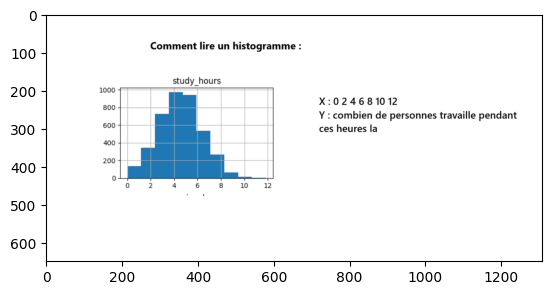

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

explication = tf.io.read_file('explication.png')
explication = tf.io.decode_jpeg(explication)
plt.imshow(explication)

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Chest pain type'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FBS over 120'}>,
        <Axes: title={'center': 'EKG results'}>,
        <Axes: title={'center': 'Max HR'}>],
       [<Axes: title={'center': 'Exercise angina'}>,
        <Axes: title={'center': 'ST depression'}>,
        <Axes: title={'center': 'Slope of ST'}>,
        <Axes: title={'center': 'Number of vessels fluro'}>],
       [<Axes: title={'center': 'Thallium'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

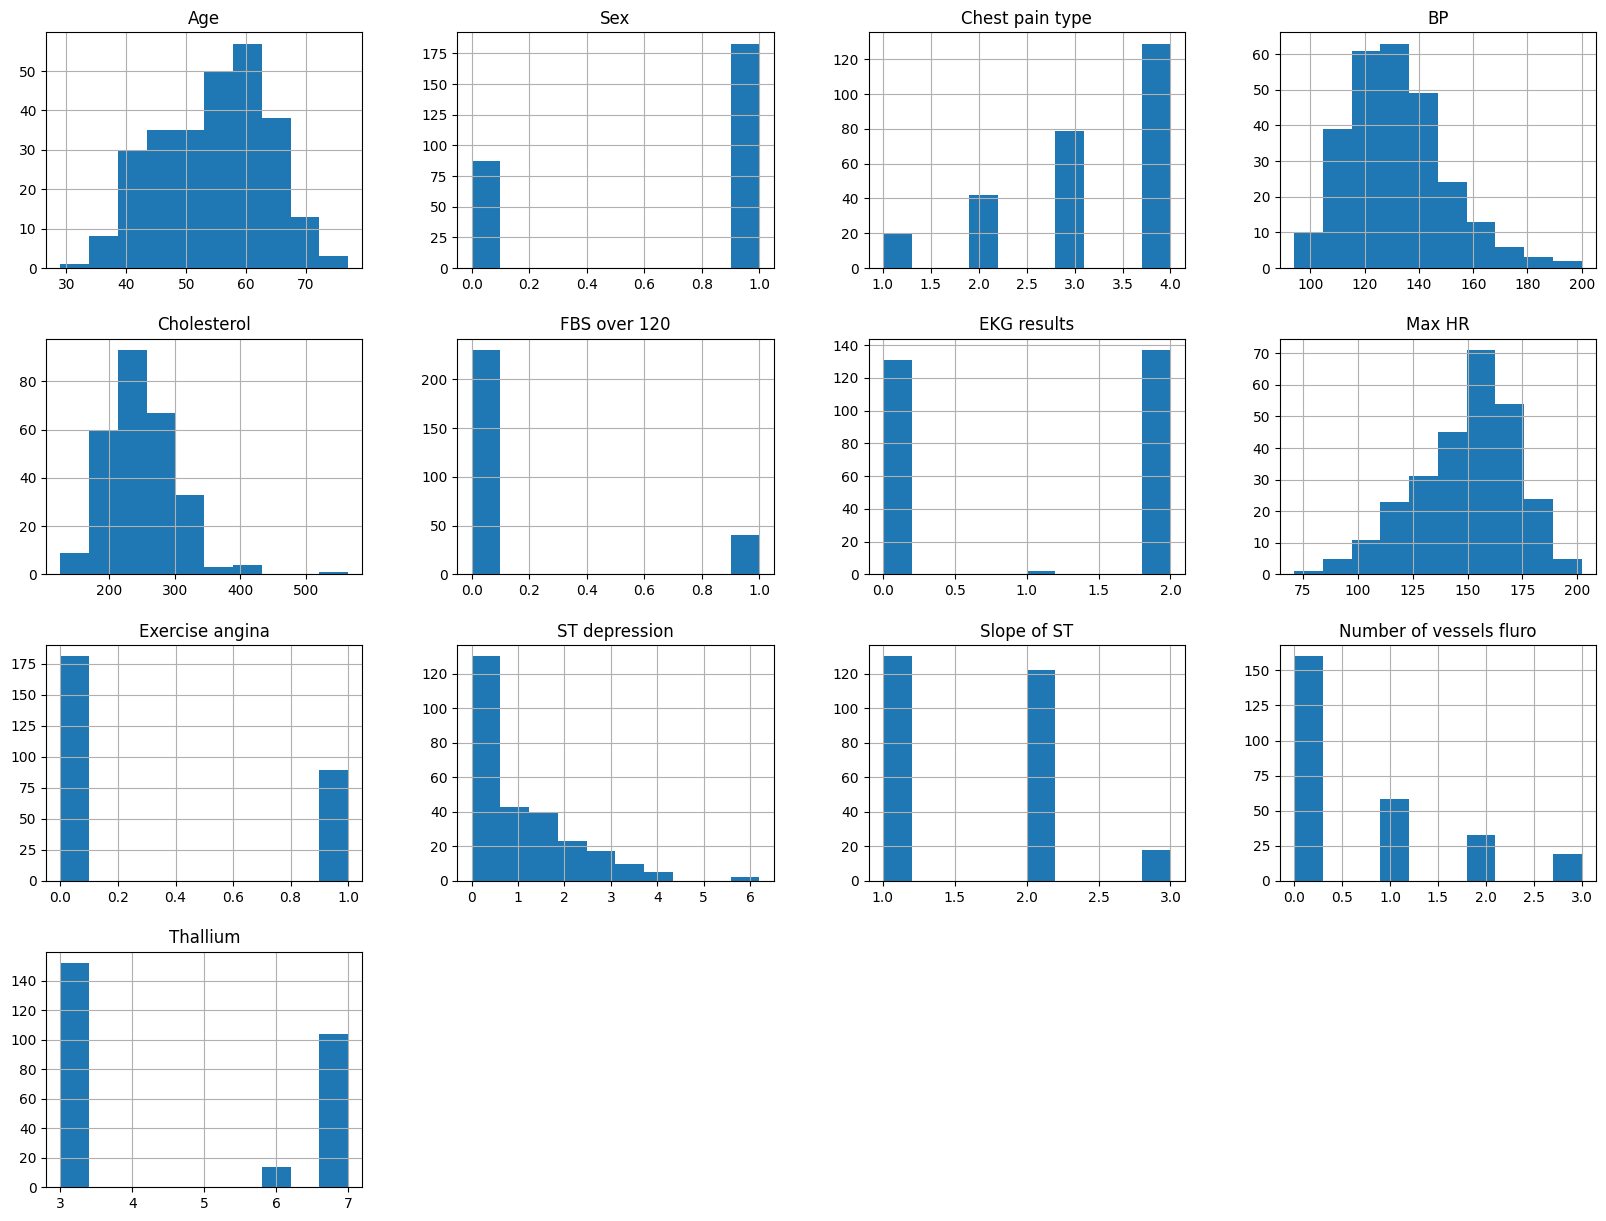

In [7]:
data.hist(figsize = (20,15)) # afficher des histogrammes de notre data

<Axes: >

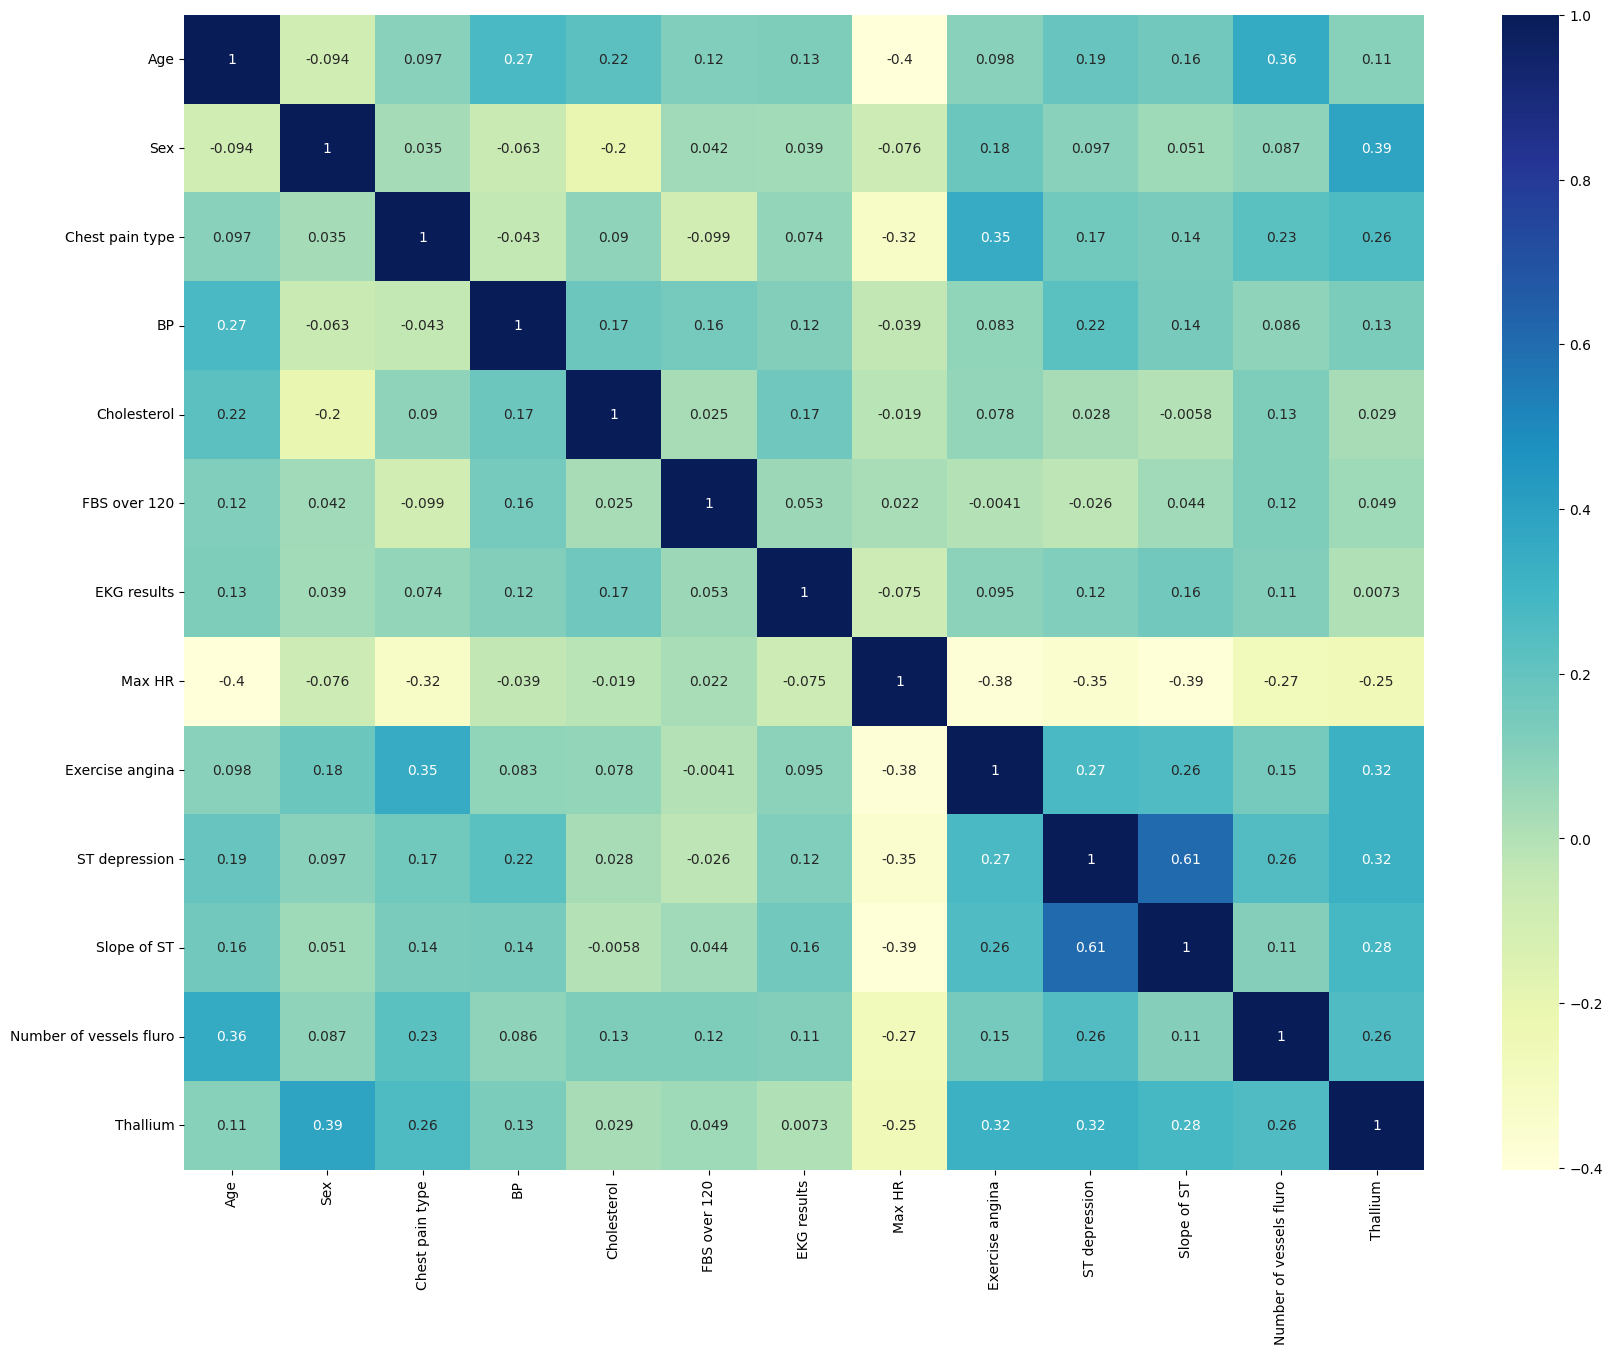

In [8]:
import seaborn as sns

plt.figure(figsize = (20,15))

correlation = data.corr(numeric_only=True) # correlation est une matrice qui contient la correlation entre tous les éléments de notre data et on met numeric_only à True parce que on a des valeurs qui ne sont pas numériques (internet_quality etc..)
sns.heatmap(correlation,annot = True, cmap="YlGnBu")


In [9]:
# numeric_only=True affiche que les valeurs numériques donc on ne peut pas observer le résultat de la maladie donc avant ça on va devoir transoformer la colonne en booleen
data["Heart Disease"] = data["Heart Disease"].map({
    "Absence": 0,
    "Presence": 1
})
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


<Axes: >

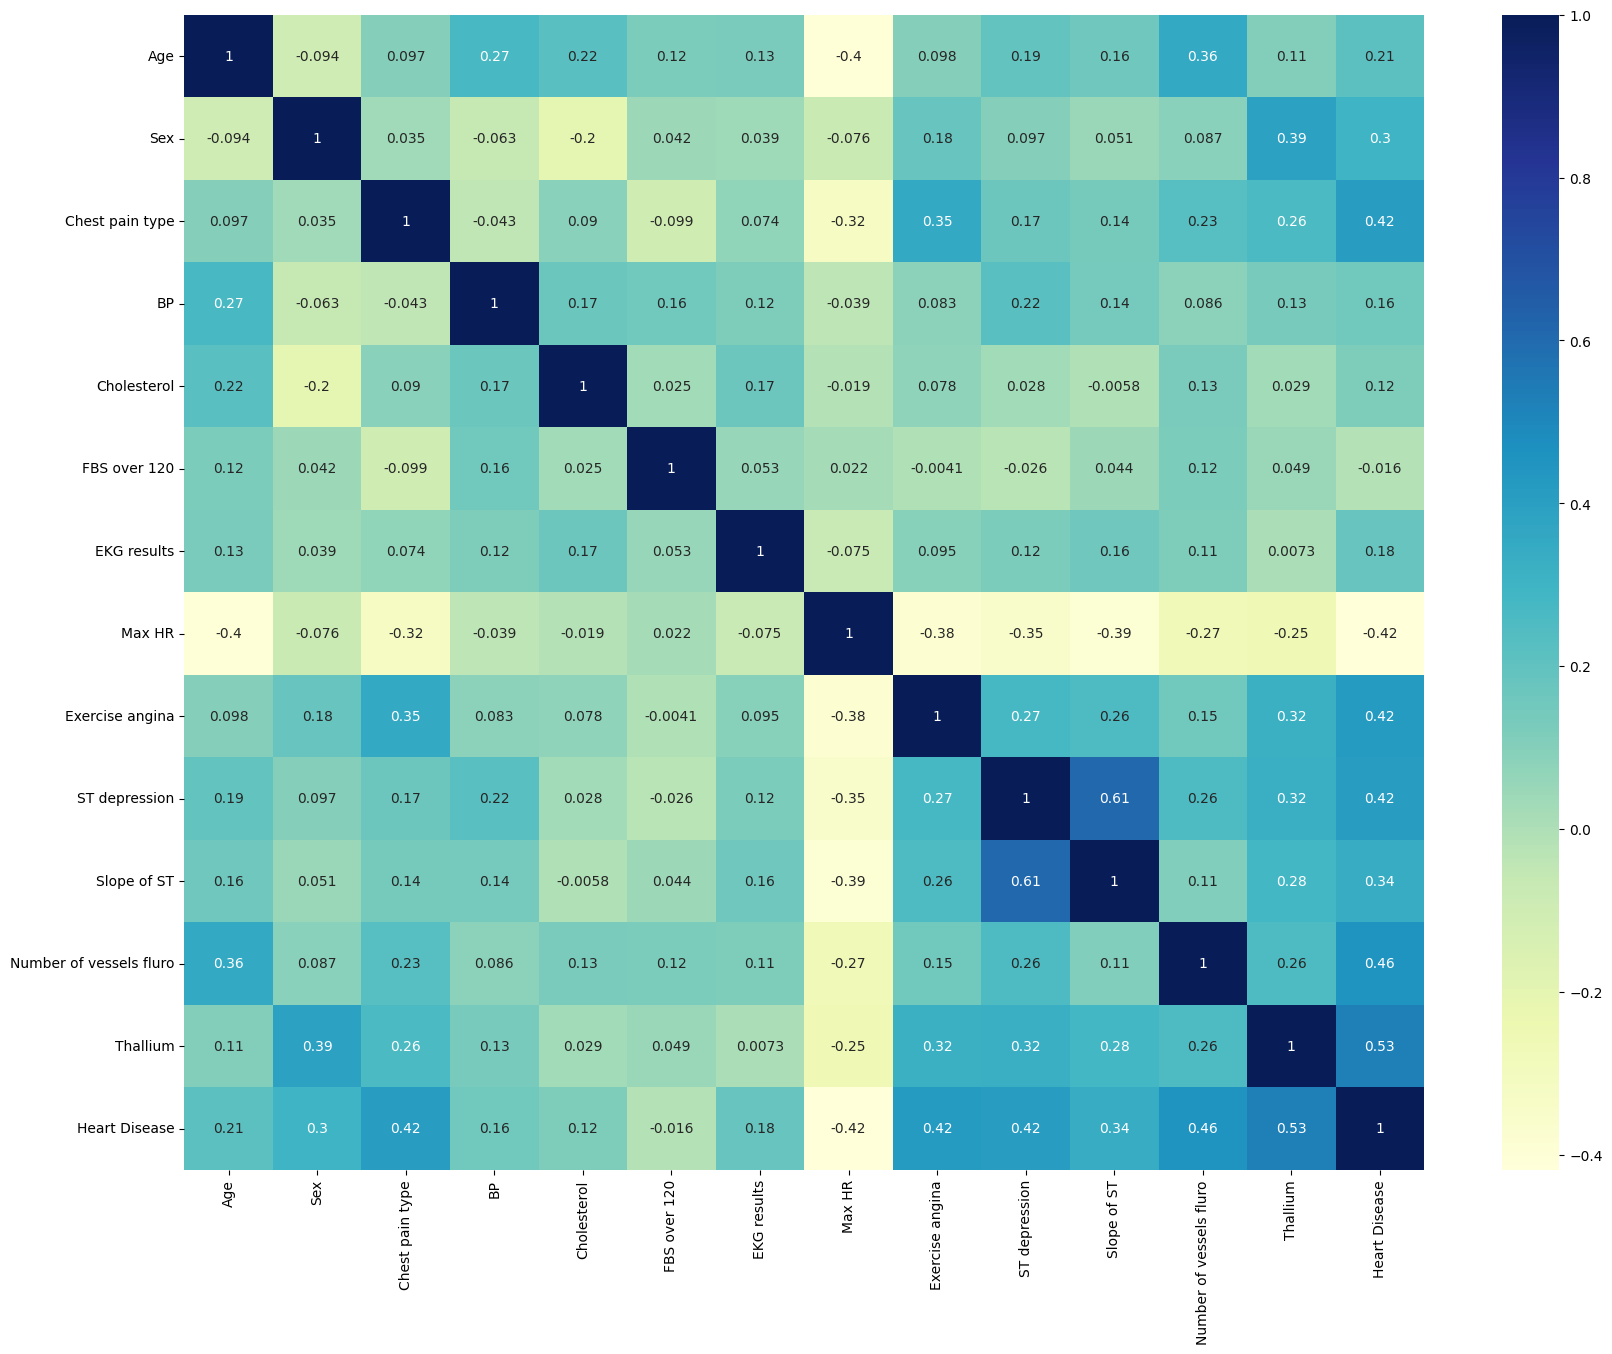

In [10]:
plt.figure(figsize = (20,15))

correlation = data.corr(numeric_only=True) # correlation est une matrice qui contient la correlation entre tous les éléments de notre data et on met numeric_only à True parce que on a des valeurs qui ne sont pas numériques (internet_quality etc..)
sns.heatmap(correlation,annot = True, cmap="YlGnBu")

# Maintenant on peut vraiment observer la matrice de correlation et voir c'est qui l'acteur majeur sur les maladies cardiaques : tous ont une contribution importante ce qui nous indique que nos donées sont très bien choisies


In [11]:
# Séparer nos variables Features et Target : 

X = data.drop("Heart Disease",axis=1)
Y = data["Heart Disease"]

# creer nos données de training et de test 80% et 20% :

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)


In [12]:
train_data = X_train.join(Y_train)  # la variable prend la jointure des données de training

In [13]:
from sklearn.linear_model import LogisticRegression # LogisticRegression au lieu de LinearRegression parce que ceci est un probleme de classification non pas de régression linéaire

model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
model.score(X_test,Y_test)

0.8148148148148148

C'est bon Notre modele est pret : 
on peut tester avec un patient fictif et voir ce que ça donne 

In [15]:
patient_test = { "Age" : 66  , "Sex" : 1  ,	"Chest pain type": 3,	"BP": 125,	"Cholesterol" : 400,	"FBS over 120": 1,	"EKG results" : 2,	"Max HR" : 130,	"Exercise angina" : 1,	"ST depression": 1.2,	"Slope of ST" : 2,	"Number of vessels fluro": 3, "Thallium" : 7}

In [16]:
patient_df = pd.DataFrame([patient_test])


In [17]:
patient_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,66,1,3,125,400,1,2,130,1,1.2,2,3,7


In [18]:
model.predict(patient_df)
#On obtient le résultat suivant : 1 c'est a dire la presonne est malade on peut faire une fonction qui renvoie un joli affichage

array([1], dtype=int64)

In [19]:
def afficher_resultat(patient):
    patient_df = pd.DataFrame([patient])
    res = model.predict(patient_df)
    if (res[0] == 0):
        print("Absence de maladie cardiaque")
    else:
        print("Présence de maladie cardiaque")
        

In [20]:
patient = { "Age" : 66  , "Sex" : 1  ,	"Chest pain type": 3,	"BP": 125,	"Cholesterol" : 400,	"FBS over 120": 1,	"EKG results" : 2,	"Max HR" : 130,	"Exercise angina" : 1,	"ST depression": 1.2,	"Slope of ST" : 2,	"Number of vessels fluro": 3, "Thallium" : 7}
afficher_resultat(patient)

Présence de maladie cardiaque


In [22]:
# on peut aussi creer une fonction qui nous permet de remplir le dictionnaire à l'aide de notre terminal : 

def remplir_dossier_medical():
    patient_test = { "Age" : 66  , "Sex" : 1  ,	"Chest pain type": 3,	"BP": 125,	"Cholesterol" : 400,	"FBS over 120": 1,	"EKG results" : 2,	"Max HR" : 130,	"Exercise angina" : 1,	"ST depression": 1.2,	"Slope of ST" : 2,	"Number of vessels fluro": 3, "Thallium" : 7}
    for element in patient_test:
        print("entrer le champs suivant:\n" ,element)
        inp = input() 
        patient_test[element] = inp
    return patient_test
    

In [23]:
patient_test = remplir_dossier_medical()

print(" Le résultat du dossier par notre modèle est : \n")
afficher_resultat(patient_test)


entrer le champs suivant:
 Age


 66


entrer le champs suivant:
 Sex


 1


entrer le champs suivant:
 Chest pain type


 3


entrer le champs suivant:
 BP


 125


entrer le champs suivant:
 Cholesterol


 400


entrer le champs suivant:
 FBS over 120


 1


entrer le champs suivant:
 EKG results


 2


entrer le champs suivant:
 Max HR


 130


entrer le champs suivant:
 Exercise angina


 1


entrer le champs suivant:
 ST depression


 1.2


entrer le champs suivant:
 Slope of ST


 2


entrer le champs suivant:
 Number of vessels fluro


 3


entrer le champs suivant:
 Thallium


 7


 Le résultat du dossier par notre modèle est : 

Présence de maladie cardiaque
